## This notebook aims to conduct the data exploration of the MNIST dataset.

### Imports
Firstly, we import the necessary libraries.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

### Loading the data
First, we have to load the images and labels.

In [2]:
# Load the labels
train_labels = np.load('../datasets/train-labels/labels.npy')
test_labels = np.load('../datasets/test-labels/labels.npy')

# Define paths to image directories
train_images_dir = '../datasets/train-images'
test_images_dir = '../datasets/test-images'

# Helper function to load images
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            images.append(np.array(img))
    return np.array(images)

# Load the images
train_images = load_images(train_images_dir)
test_images = load_images(test_images_dir)

### Understanding the data structure
Next, we check the structure of the images and labels. We can confirm that each image is 28 pixels by 28 pixels, and there are 60,000 samples for the training images, and 10,000 samples for the test images.

In [3]:
print(f'Training images shape: {train_images.shape}')
print(f'Training labels shape: {train_labels.shape}')
print(f'Testing images shape: {test_images.shape}')
print(f'Testing labels shape: {test_labels.shape}')

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)


### Trimming the datasets
As the number of samples is extremely large, we shall trim the datasets to ensure more efficient computations.

In [26]:
def trim_dataset(images, labels, fraction=0.1):
    # Use train_test_split to randomly sample a subset of the dataset
    images_trimmed, _, labels_trimmed, _ = train_test_split(images, labels, train_size=fraction, stratify=labels)
    return images_trimmed, labels_trimmed
    
# Trim the datasets (10% of the original size)
train_images_trimmed, train_labels_trimmed = trim_dataset(train_images, train_labels, fraction=0.1)
test_images_trimmed, test_labels_trimmed = trim_dataset(test_images, test_labels, fraction=0.1)

# Verify the trimmed data
print(f'Trimmed to {len(train_images_trimmed)} training images and {len(train_labels_trimmed)} training labels.')
print(f'Trimmed to {len(test_images_trimmed)} testing images and {len(test_labels_trimmed)} testing labels.')

Trimmed to 6000 training images and 6000 training labels.
Trimmed to 1000 testing images and 1000 testing labels.


### Visualising the data
Now, let's take a look at the first 10 images of the dataset.

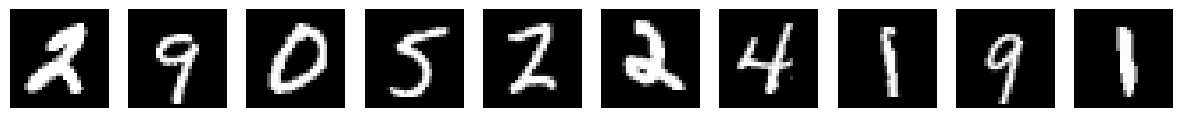

In [18]:
fig, axes = plt.subplots(1, 10, figsize=(15, 1.5))
for i in range(10):
    axes[i].imshow(train_images_trimmed[i], cmap='gray')
    axes[i].axis('off')
plt.show()

### Identifying class imbalances
Let's also take a look at the label distribution to identify any class imbalances. We can see from the histogram that the distribution of labels for the training and test data are approximately the same. Hence, we are unlikely to require any resampling techniques, or accounting for class imbalances in the loss function.

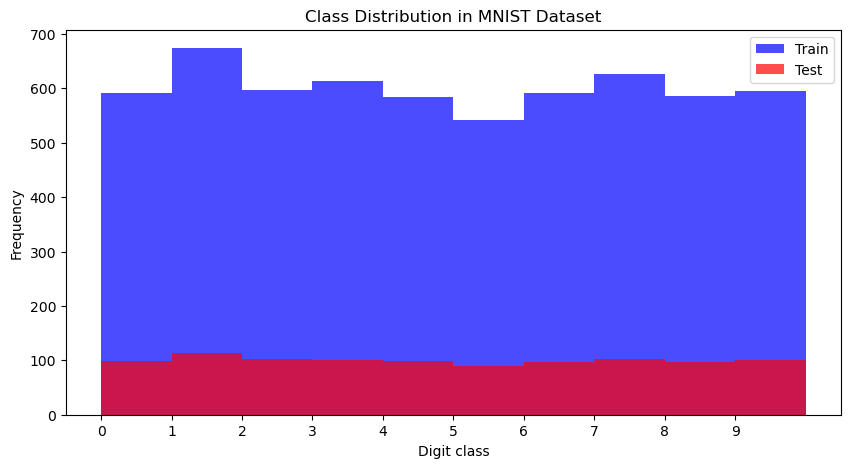

In [9]:
plt.figure(figsize=(10, 5))
plt.hist(train_labels_trimmed, bins=range(11), alpha=0.7, color='blue', label='Train')
plt.hist(test_labels_trimmed, bins=range(11), alpha=0.7, color='red', label='Test')
plt.xticks(range(10))
plt.xlabel('Digit class')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Class Distribution in MNIST Dataset')
plt.show()

### Identifying outliers
Next, we can attempt to identify if there are any outlier pixels with respect to this image, which must be imputed. Taking a look at the sample images, it seems that there are mainly two distinct pixel intensities. Hence, the traditional method of finding outliers using the upper and lower quartiles with the interquartile range is not feasible, as many pixels would have to be imputed due to the limited range of pixel values.

Due to the difficulty in defining an outlier, I chose not to impute any values as I prioritised the integrity of the data. The presence of outliers could also help to increase the robust-ness of the model trained.

### Identifying missing values
We can also identify how many images have NaN pixel values. Fortunately, there are no images with NaN pixel values.

In [22]:
print(f'Number of missing values in training labels: {np.sum(np.isnan(train_labels_trimmed))}')
print(f'Number of missing values in testing labels: {np.sum(np.isnan(test_labels_trimmed))}')

Number of missing values in training labels: 0
Number of missing values in testing labels: 0
